In [84]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('Atividades 2023_11.csv')

In [85]:
df = pd.read_excel('RELATÓRIO DE NOVEMBRO Lussandra.xlsx', sheet_name='activities list')

In [86]:
#Renomear colunas que serão trabalhadas
df.rename(columns={'Atividade - Data atualizada': 'Data', 'Atividade - Assunto' : 'Assunto', 'Pessoa - Consultor responsável':'Consultor'}, inplace=True)

In [87]:
#Transformar a coluna Data em formato datetime
df.Data = pd.to_datetime(df.Data)

#Selecionar ano e mês
df = df[(df['Data'].dt.year == 2023) & (df['Data'].dt.month == 11)]

#Selecionar colunas Consultor e Assunto
df = df[['Consultor', 'Assunto']]

#Visualizar tabela
df

,Consultor,Assunto
0,KARINA,NOVA TENTATIVA/CONTATO PROCESSO
1,KARINA,NOVA TENTATIVA/CONTATO PROCESSO
2,KARINA,NOVA TENTATIVA/CONTATO PROCESSO
3,KARINA,NOVA TENTATIVA/CONTATO PROCESSO
4,KARINA,NOVA TENTATIVA/CONTATO PROCESSO
...,...,...
2003,DANIELLE MORAES,LEAD DIGITAL
2004,DANIELLE MORAES,ATENDIMENTO WHATSAPP
2005,DANIELLE MORAES,ANÁLISE JUR. - HEITOR
2006,DANIELLE MORAES,LEAD DIGITAL


In [88]:
#Agrupamento por consultora para ver possíveis multiplicidades
df.Consultor.value_counts()

KARINA             855
GABRIELA           657
DANIELLE MORAES    495
Name: Consultor, dtype: int64

In [89]:
#Agrupamento das consultoras para unificação

mapeamento = {'Gabriela': 'GABRIELA', 'DANIELLE MORAES': 'DANIELLE', 'Karina': 'KARINA', 'Danielle Moraes': 'DANIELLE','Danielle Moares':'DANIELLE' }

In [90]:
df['Consultor'] = df['Consultor'].replace(mapeamento)

### Elaboração do Funil

Para elaboração do gráfico de funil, é preciso agrupar os estágios que cada lead/cliente está para que se tenha uma melhor visualização da performance de cada consultora e da empresa no geral.

Numa primeira etapa, vamos avaliar como estão registradas as atividades.

In [93]:
df['Assunto'].value_counts().sort_index().head(60)

1ª TENTATIVA                       174
2ª TENTATIVA                       143
3ª TENTATIVA                       142
4ª TENTATIVA                       138
5ª TENTATIVA                       121
6ª TENTATIVA                       100
7ª TENTATIVA                       101
ADVOGADOS                            2
AGUARDANDO AUTORIZAÇÃO               2
AGUARDANDO PROPOSTA                 19
AGUARDANDO RETORNO                  19
AGUARDANDO RETORNO DO CLIENTE        5
ANÁLISE JUR. - HEITOR                3
ANÁLISE PRECATÓRIOS FEDERAIS         2
ANÁLISE PROCESSUAL                   1
APRESENTAÇÃO DE PROPOSTA            13
ASSINATURA/PAGAMENTO                 5
ATENDIMENTO WHATSAPP                46
CONTATO INCORRETO                   12
CONTRAPROPOSTA                       1
CPF RECUPERADO                       5
DECLINOU A PROPOSTA                  6
DOCUMENTOS PESSOAIS                  3
EMISSÃO DE CERTIDÕES                12
EMPRESAS                             1
ENVIO DE E-MAIL          

In [94]:
#Unificando os nomes das etapas para elaboração do funil
map_prospeccao = {'1ª TENTATIVA': 'Prospecção','2ª TENTAIVA': 'Prospecção', '2ª TENTATIVA': 'Prospecção','2ª  TENTATIVA':'Prospecção',
                  '3ª TENTATIVA': 'Prospecção','3ª  TENTATIVA':'Prospecção', '4ª TENTATIVA': 'Prospecção',
                  '5ª TENTATIVA':'Prospecção','5ª  TENTATIVA': 'Prospecção','6ª TENTATIVA': 'Prospecção',
                  '7ª TENTATIVA': 'Prospecção','7ª  TENTATIVA':'Prospecção','PESQUISA CRED': 'Prospecção',
                  'PESQUISA NAT BASE': 'Prospecção','NOVA TENTATIVA/PESQUISA PROCESSO': 'Prospecção',
                  'PESQUISA INSTAGRAM': 'Prospecção','PESSQUISA CRED':'Prospecção', 'ADVOGADOS':'Prospecção',
                  'PESQUISA NATT':'Prospecção','CONTATO INCORRETO':'Prospecção', 'CPF RECUPERADO': 'Prospecção',
                  'PESQUISA INSTAGRAM/FACEBOOK':'Prospecção','PESQUISA NAT':'Prospecção',
                  'NOVA TENTATIVA/ CONTATO PROCESSO': 'Prospecção','NOVA TENTATIVA/ PESQUISA PROCESSO': 'Prospecção',
                  'NOVA TENTATIVA/CONTATO INCORRETO': 'Prospecção','NOVA TENTATIVA/CONTATO PROCESSO':'Prospecção',
                  'NOVA TENTATIVA/PESQUISA PROCESSO':'Prospecção','NOVA TENTATIVA/PROCESSO':'Prospecção',
                  'NÃO LOCALIZADO':'Prospecção','NOVE TENTATIVA/PESQUISA PROCESSO':'Prospecção', 'PESQUISA PROCESSUAL':'Prospecção'}

map_atendimento = {'AGUARDANDO RETORNO': '1º Atendimento','AGUARDANDO O RETORNO DO CLIENTE':'1º Atendimento',
                   'AGUARDANDO RETORNO DO CLIENTE':'1º Atendimento','TRIMESTRALIDADE': '1º Atendimento',
                   'NÃO TEM INTERESSE': '1º Atendimento','NAÕ TEM INTERESSE':'1º Atendimento',
                  'AGUARDANDO AUTORIZAÇÃO': '1º Atendimento','JÁ RECEBEU': '1º Atendimento',
                   'LEADS NÃO RESPONDEM': '1º Atendimento', '1ª ATENDIMENTO':'1º Atendimento', 'LEAD DIGITAL':'1º Atendimento'}

map_fup = {'FOLLOW UP -  WHATSAPP': 'Follow Up', 'ENVÍO DE VÍDEO': 'Follow Up', 'LIGAÇÃO': 'Follow Up',
          'Follow up - Ligação': 'Follow Up', 'FOLLOW UP - INSTAGRAM': 'Follow Up', 'FOLLOW UP - PESQUISA INSTAGRAM':'Prospecção',
          'FOLLOW - UP INSTAGRAM':'Follow Up'}

map_elaboracao = {'AGUARDANDO PROPOSTA': 'Elaboração','AGUARDAND PROPOSTA':'Elaboração',
                  'Dados complementares - Comercial': 'Elaboração','ANÁLISE JUR. - HEITOR': 'Elaboração',
                  'ANÁLISE JUR.  HEITOR':'Elaboração', 'ANÁLISE JUR. HEITOR':'Elaboração',
                 'CÁLCULO FINALIZADO': 'Elaboração', 'AGUARDANDO PROPOSTA': 'Elaboração','EMISSÃO  DE CERTIDÕES': 'Elaboração',
                  'EMISSÃO DE CERTIDÃO': 'Elaboração','EMISSÃO DE CERTIDÕES': 'Elaboração',
                  'Certidões com Pendências': 'Elaboração', 'Contraproposta': 'Elaboração',
                 'Aguardando Andamento Processual': 'Elaboração', 'NÃO APRESENTAR PROPOSTA': 'Elaboração',
                 'ANÁLISE PRECATÓRIOS FEDERAIS':'Elaboração'}

map_apresentacao = {'PROPOSTA PRONTA': 'Apresentação', 'PROPOSTA AGENDADA': 'Apresentação', 
                    'APRESENTAÇÃO DE PROPOSTA': 'Apresentação','APRESENTAÇÃO DA PROPOSTA': 'Apresentação',
                    'APRSENTAÇÃO DE PROPOSTA':'Apresentação', 'AGUARDANDO RESPOSTA DO CLIENTE': 'Apresentação',
                   'DECLINOU A PROPOSTA': 'Apresentação','DECLINOU PROPOSTA': 'Apresentação',
                    'FOLLOW UP AVALIAÇÃO': 'Apresentação',
                   'PROPOSTA NÃO APRESENTADA': 'Apresentação'}

map_fup_dp = {'FOLLOW UP - WHATSAPP DP': 'Follow Up DP', 'Follow up- sms DP': 'Follow Up DP',
              'Follow up e-mail DP': 'Follow Up DP', 'NÃO RETRABALHAR DP':'Follow Up DP',
          'Follow up- Ligação DP': 'Follow Up DP', 'Follow up- Instagram DP': 'Follow Up DP', 'NÃO RETABRALHAR DP': 'Follow Up DP' }

map_fechamento = {'PROPOSTA ACEITA': 'Fechamento', 'DOCUMENTOS PESSOAIS': 'Fechamento','CERTIDÕES': 'Fechamento','CERTIDOES':'Fechamento',
                 'ANÁLISE PROCESSUAL': 'Fechamento','ASSINATURA/PAGAMENTO': 'Fechamento','COLETA DE DEPOIMENTO': 'Fechamento'}

map_lead_morto = {'NÃO TEM PRECATÓRIO':'Lead Morto','LEAD DIGITAL FEDERAL/ OUTROS ESTADOS':'Lead Morto'}

df_agrupado = df.copy()

df_agrupado['Assunto'] = df_agrupado['Assunto'].replace(map_prospeccao) \
                        .replace(map_atendimento) \
                        .replace(map_fup) \
                        .replace(map_elaboracao) \
                        .replace(map_apresentacao) \
                        .replace(map_fup_dp) \
                        .replace(map_fechamento) \
                        .replace(map_lead_morto)


In [95]:
df_agrupado

,Consultor,Assunto
0,KARINA,Prospecção
1,KARINA,Prospecção
2,KARINA,Prospecção
3,KARINA,Prospecção
4,KARINA,Prospecção
...,...,...
2003,DANIELLE,1º Atendimento
2004,DANIELLE,ATENDIMENTO WHATSAPP
2005,DANIELLE,Elaboração
2006,DANIELLE,1º Atendimento


In [96]:
#Tabela Dinâmica

df_agrupado.pivot_table(index='Consultor', columns='Assunto', aggfunc='size')

Assunto,1º Atendimento,ATENDIMENTO WHATSAPP,Apresentação,CONTRAPROPOSTA,EMPRESAS,ENVIO DE E-MAIL,ENVIO DE VÍDEO,Elaboração,FOLLOW UP - LIGAÇÃO,Fechamento,Follow Up,Follow Up DP,Lead Morto,Prospecção
Consultor,,,,,,,,,,,,,,
DANIELLE,44.0,27.0,17.0,1.0,NaN,NaN,53.0,10.0,NaN,3.0,86.0,NaN,2.0,252.0
GABRIELA,26.0,17.0,11.0,NaN,1.0,4.0,NaN,15.0,2.0,12.0,26.0,12.0,NaN,531.0
KARINA,18.0,2.0,1.0,NaN,NaN,NaN,88.0,12.0,NaN,NaN,23.0,NaN,NaN,711.0


In [77]:
#Exportação da tabela dinâmica em um novo dataframe para que os dados possam originar um gráfico
df_pivot = df_agrupado.pivot_table(index='Assunto', columns='Consultor', aggfunc='size')
df_agrupado = pd.DataFrame(df_pivot.to_records())
df_agrupado.set_index('Assunto', inplace=True)

#Ordenar as etapas para que fiquem na ordem específica do funil
ordem_etapas = ['Prospecção', '1º Atendimento', 'Follow Up', 'Elaboração', 'Apresentação',
                'Follow Up DP', 'Fechamento', 'Lead Morto']
df_ordenado = df_agrupado.loc[ordem_etapas]
df_ordenado = df_ordenado.fillna(0)
df_ordenado

,DANIELLE,GABRIELA,KARINA
Assunto,,,
Prospecção,252.0,531.0,711.0
1º Atendimento,44.0,26.0,18.0
Follow Up,86.0,26.0,23.0
Elaboração,10.0,15.0,12.0
Apresentação,17.0,11.0,1.0
Follow Up DP,0.0,12.0,0.0
Fechamento,3.0,12.0,0.0
Lead Morto,2.0,0.0,0.0


In [104]:
fig = px.funnel(df_ordenado, title='Funil Comercial por Consultora', labels={'value': 'Quantidade', 'variable': 'Consultora'})
fig.show()

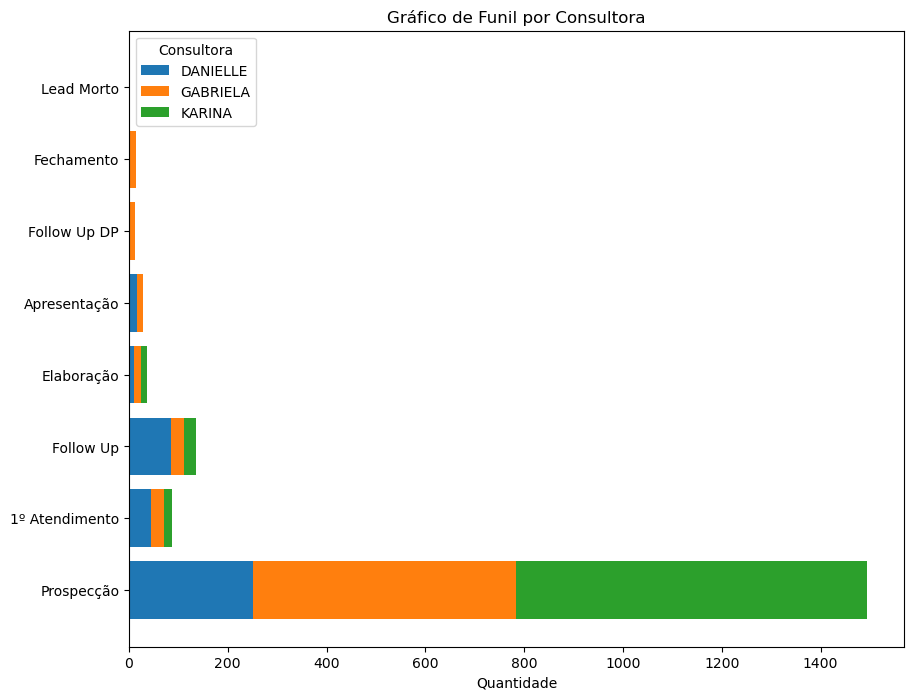

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
consultoras = ['DANIELLE', 'GABRIELA', 'KARINA']
etapas = ['Prospecção', '1º Atendimento', 'Follow Up', 'Elaboração', 'Apresentação', 'Follow Up DP', 'Fechamento', 'Lead Morto']
dados = np.array([
    [252, 44, 86, 10, 17, 0, 3, 2],
    [531, 26, 26, 15, 11, 12, 12, 0],
    [711, 18, 23, 12, 1, 0, 0, 0]
])

# Criando o gráfico de funil
fig, ax = plt.subplots(figsize=(10, 8))

bottom = np.zeros(len(etapas))
for i, consultora in enumerate(consultoras):
    ax.barh(etapas, dados[i], label=consultora, left=bottom)
    bottom += dados[i]

# Configurando rótulos e legendas
ax.set_xlabel('Quantidade')
ax.set_title('Gráfico de Funil por Consultora')
ax.legend(title='Consultora', loc='upper left')

plt.show()




## Métricas de Desempenho Absolutas


#### Leads Totais

Somatórios de leads e clientes trabalhados por consultora no período

In [102]:
df['Consultor'].value_counts()

KARINA      855
GABRIELA    657
DANIELLE    495
Name: Consultor, dtype: int64

#### Apresentação de Proposta



In [100]:
apresentacao = df[df['Assunto']=='APRESENTAÇÃO DE PROPOSTA']
apresentacao.pivot_table(index='Consultor', columns='Assunto', aggfunc='size', fill_value=0)

Assunto,APRESENTAÇÃO DE PROPOSTA
Consultor,
DANIELLE,8
GABRIELA,4
KARINA,1


#### Aguardando Proposta

In [101]:
aguardando = df[df['Assunto']=='AGUARDANDO PROPOSTA']
aguardando.pivot_table(index='Consultor', columns='Assunto', aggfunc='size', fill_value=0)

Assunto,AGUARDANDO PROPOSTA
Consultor,
DANIELLE,5
GABRIELA,7
KARINA,7


#### Finalizações

Aqui considera-se somente os clientes que já tiveram suas cessões assinadas.

In [98]:
fechamentos = df[df['Assunto']=='ASSINATURA/PAGAMENTO']
fechamentos.pivot_table(index='Consultor', columns='Assunto', aggfunc='size', fill_value=0)

Assunto,ASSINATURA/PAGAMENTO
Consultor,
DANIELLE,1
GABRIELA,4


## Métricas de Desempenho Relativo

#### Conversão

1º Atendimento/Prospecção

Usa-se essa métrica para medir a efetividade dos métodos de contato com os leads.

In [79]:
conversao_prospeccao_atendimento = df_ordenado.loc['1º Atendimento'] / df_ordenado.loc['Prospecção']
conversao_prospeccao_atendimento_total = df_ordenado.loc['1º Atendimento'].sum() / df_ordenado.loc['Prospecção'].sum()

print("CONVERSÃO PROSPECÇÃO -> ATENDIMENTO\n")
print('===================================\n')
print(conversao_prospeccao_atendimento.map(lambda x: f'{x:.2%}'))
print('\nConversão total: ') 
# conversao_prospeccao_atendimento_total


CONVERSÃO PROSPECÇÃO -> ATENDIMENTO


DANIELLE    17.46%
GABRIELA     4.90%
KARINA       2.53%
dtype: object

Conversão total: 


##### Jurídico

Apresentação/Elaboração





In [103]:
conversao_juridico = df_ordenado.loc['Apresentação'] / (df_ordenado.loc['Elaboração']+ df_ordenado.loc['Apresentação'])
print("CONVERSÃO JURÍDICO")
print('===================================')
conversao_juridico.map(lambda x: f'{x:.2%}')

CONVERSÃO JURÍDICO


DANIELLE    62.96%
GABRIELA    42.31%
KARINA       7.69%
dtype: object

##### Assinaturas

Fechamentos/Potenciais Clientes

Considera-se um potencial cliente alguém que ao menos quis receber uma proposta, ou seja, está na etapa de elaboração. Daí, somam-se todas as etapas até o momento do aceite por parte do cliente.

In [81]:
conversao_assinaturas = df_ordenado.loc['Fechamento'] / (df_ordenado.loc['Elaboração'] + df_ordenado.loc['Apresentação']+
                                                         df_ordenado.loc['Follow Up DP'])
                                                         
print("CONVERSÃO ASSINATURAS")
print('===================================')
conversao_assinaturas.map(lambda x: f'{x:.2%}')

CONVERSÃO ASSINATURAS


DANIELLE    11.11%
GABRIELA    31.58%
KARINA       0.00%
dtype: object